In [1]:
import pystan as ps
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
import matplotlib as mpl

# used to force examples to run from local copy, rather than installed copy
import os, sys; sys.path.insert(0, os.path.abspath('../'))
import btom as bt

### Single Qubit Example

Define the 'true' state before we begin:

In [2]:
psi = np.array([[1],[1j]])/np.sqrt(2)
rho = np.dot(psi, psi.conj().T)

We will be performing the following measurements:

In [3]:
meas_ops = (bt.pauli_basis()[1:] + np.eye(2)) / 2
meas_ops

Simulate some data based off of the true state using binomial statistics with 500 shots per measurement operator:

In [4]:
data = bt.BinomialTomographyData.simulate(rho, meas_ops, [500,500,500])
print('measurement results: {}'.format(data.results))

measurement results: [249 500 242]


Now we can construct an MCMC sampler with a Ginibre (K=2) prior, and feed this and the data in to get samples from a posterior.

In [5]:
sampler = bt.BinomialGinibreStateSampler(ginibre_dim=2, n_chains=4)
posterior = bt.StatePosterior(sampler, data)

Make some plots of the resulting posterior:

(2, 4)


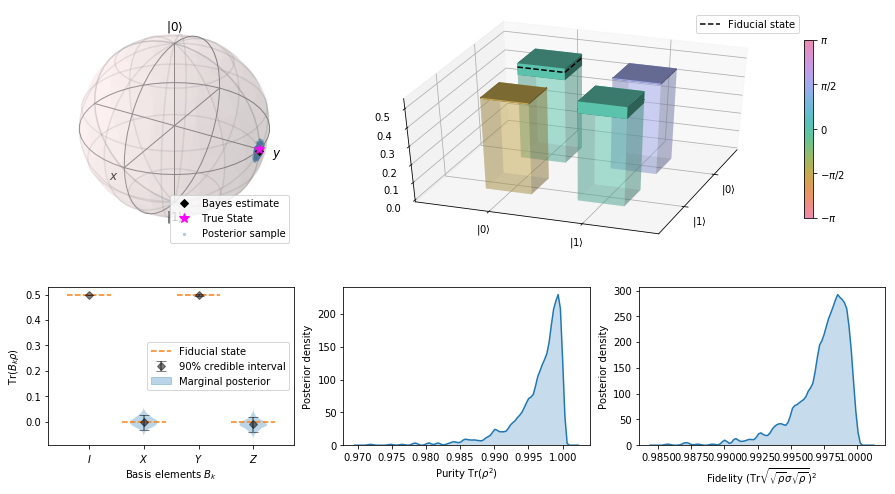

In [6]:
fig = plt.figure(figsize=(15, 8))
gs = mpl.gridspec.GridSpec(2,3, height_ratios=[3,2])

ax_bloch = plt.subplot(gs[0,0], projection='3d')
posterior.plot_bloch(axes=ax_bloch, fiducial_state=rho, fiducial_state_kwargs={'label': 'True State'})

ax_mat = plt.subplot(gs[0,1:3], projection='3d')
posterior.plot_matrix(axes=ax_mat, fiducial_state=rho)

ax_be = plt.subplot(gs[1,0])
posterior.plot_basis_expansion(bt.pauli_basis(), fiducial_state=rho)

ax_purity = plt.subplot(gs[1,1])
posterior.plot_purity()

ax_fidelity = plt.subplot(gs[1,2])
posterior.plot_fidelity(rho)

### Two Qubit Example

Everything is basically the same as above. We use the cat state as our true state, and we measure 15 combinations of Paulis offset by the identity.

In [7]:
psi = np.array([[1],[0],[0],[1j]])/np.sqrt(2)
rho = np.dot(psi, psi.conj().T)

meas_ops = (bt.pauli_basis() + np.eye(2))/2
meas_ops = meas_ops.kron(meas_ops)[1:]

Generate the data with binomial sampling at 500 shots per measurement operator.

In [8]:
data = bt.BinomialTomographyData.simulate(rho, meas_ops, 10000)
print('measurement results: {}'.format(data.results))

measurement results: [5094 4996 4960 5056 2525 4944 2490 5082 4996 2538 2479 4941 2424 2487
 5078]


Define the sampler and draw posterior samples.

In [9]:
sampler = bt.BinomialGinibreStateSampler(n_chains=4, ginibre_dim=2)
posterior = bt.StatePosterior(sampler, data)

Now let's make a few plots:

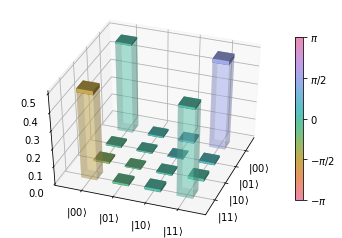

In [10]:
posterior.plot_matrix(vector_basis=bt.canonical_basis([2,2]))

(2, 16)


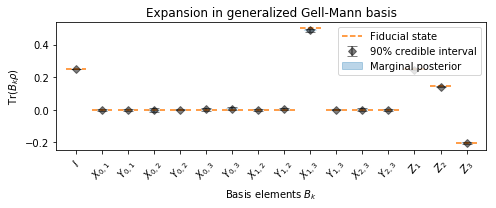

In [11]:
plt.figure(figsize=(7,3))
posterior.plot_basis_expansion(bt.gell_mann_basis(4), fiducial_state=rho)
plt.setp(plt.gca().xaxis.get_majorticklabels(), rotation=50) # rotate tick labels
plt.title('Expansion in generalized Gell-Mann basis')
plt.tight_layout()

(2, 16)


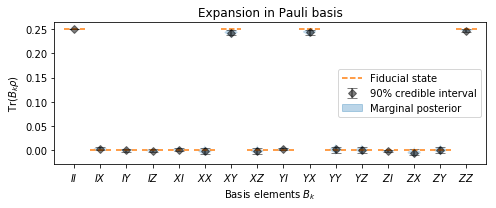

In [12]:
plt.figure(figsize=(7,3))
posterior.plot_basis_expansion(bt.pauli_basis(2), fiducial_state=rho)
plt.title('Expansion in Pauli basis')
plt.tight_layout()

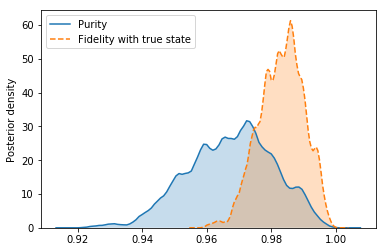

In [13]:
posterior.plot_purity(label='Purity')
posterior.plot_fidelity(rho, label='Fidelity with true state', ls='--')
plt.xlabel('')
plt.legend()

(array([ 1.,  1.,  1.,  1.,  2.,  2.,  1.,  1.,  2.,  1.,  8.,  5.,  8.,
        10., 10., 14., 15., 23., 21., 20., 29., 19., 31., 39., 34., 33.,
        33., 34., 45., 40., 38., 41., 34., 57., 42., 39., 34., 33., 37.,
        29., 20., 20., 15., 18., 20., 17.,  8.,  8.,  3.,  3.]),
 array([0.92174124, 0.92324418, 0.92474712, 0.92625006, 0.927753  ,
        0.92925594, 0.93075888, 0.93226182, 0.93376476, 0.9352677 ,
        0.93677064, 0.93827358, 0.93977652, 0.94127946, 0.9427824 ,
        0.94428534, 0.94578829, 0.94729123, 0.94879417, 0.95029711,
        0.95180005, 0.95330299, 0.95480593, 0.95630887, 0.95781181,
        0.95931475, 0.96081769, 0.96232063, 0.96382357, 0.96532651,
        0.96682945, 0.96833239, 0.96983533, 0.97133827, 0.97284121,
        0.97434415, 0.97584709, 0.97735003, 0.97885297, 0.98035591,
        0.98185885, 0.98336179, 0.98486473, 0.98636767, 0.98787061,
        0.98937355, 0.99087649, 0.99237943, 0.99388237, 0.99538531,
        0.99688825]),
 <a list of 50

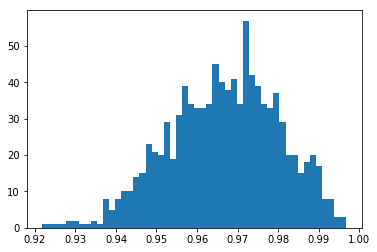

In [14]:
plt.hist(np.abs(np.dot(np.dot(psi.T.conj(), posterior.states),psi).flatten())**2,50)